# C. Bài tập

Chọn lấy 1 bộ dữ liệu bất kì từ đây. https://archive.ics.uci.edu/


Chọn lấy ít nhất 3 thuật toán classification tại thư viện Scikit-Learn: https://scikit-learn.org/stable/auto_examples/classification/index.html

So sánh kết quả vẽ hình, đánh giá dựa trên các performance metrics, ví dụ một số metrics tại đây:
https://permetrics.readthedocs.io/en/latest/pages/regression.html

https://github.com/thieu1995/PerMetrics






In [116]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)


{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [118]:
y

,symboling
0,3
1,3
2,1
3,2
4,2
...,...
200,-1
201,-1
202,-1
203,-1


In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# Prepare data

In [120]:
# Handling Missing Data
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Encoding Categorical Variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [121]:
def draw_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Random Forest

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.71      1.00      0.83         5
           0       1.00      0.78      0.88        18
           1       0.73      1.00      0.84         8
           2       1.00      0.60      0.75         5
           3       0.80      1.00      0.89         4

    accuracy                           0.85        41
   macro avg       0.87      0.90      0.86        41
weighted avg       0.89      0.85      0.85        41



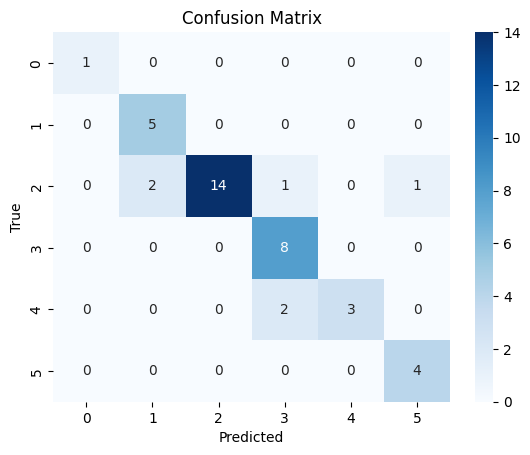

In [122]:
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

random_forest_pipeline.fit(X_train, y_train)

y_pred = random_forest_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

draw_confusion_matrix(y_test, y_pred)

# Logistic Regression

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.83      1.00      0.91         5
           0       0.86      0.67      0.75        18
           1       0.62      0.62      0.62         8
           2       0.38      0.60      0.46         5
           3       0.75      0.75      0.75         4

    accuracy                           0.71        41
   macro avg       0.74      0.77      0.75        41
weighted avg       0.74      0.71      0.72        41



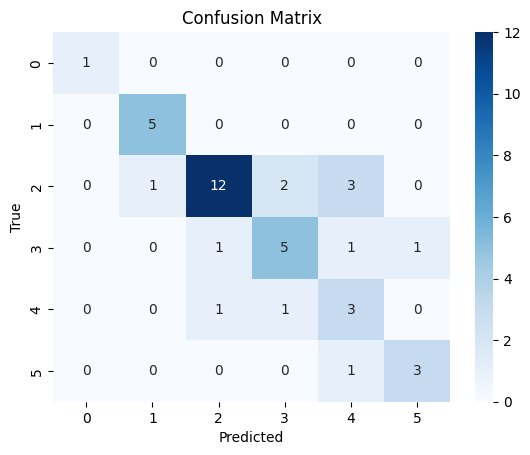

In [123]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

draw_confusion_matrix(y_test, y_pred)

# Support Vector Classifier

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       0.71      1.00      0.83         5
           0       0.92      0.67      0.77        18
           1       0.46      0.75      0.57         8
           2       0.50      0.40      0.44         5
           3       0.75      0.75      0.75         4

    accuracy                           0.68        41
   macro avg       0.56      0.59      0.56        41
weighted avg       0.72      0.68      0.68        41



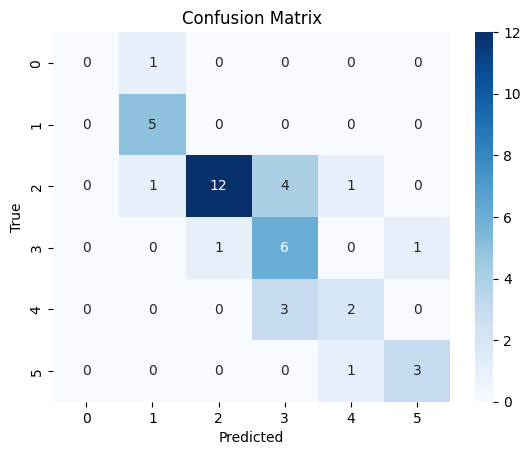

In [124]:
model_pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

model_pipeline_svc.fit(X_train, y_train)
y_pred = model_pipeline_svc.predict(X_test)
print(classification_report(y_test, y_pred)) 

draw_confusion_matrix(y_test, y_pred)